# Building and Visualizing word frequencies


# Setup

In [2]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import numpy as np
from utils import process_tweet, build_freqs

## Load the NLTK sample dataset

In [3]:
# select the lists of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# concatenate the lists, 1st part is the positive tweets followed by the negative
tweets = all_positive_tweets + all_negative_tweets

# let's see how many tweets we have
print("Number of tweets: ", len(tweets))

Number of tweets:  10000


In [7]:
# make a numpy array representing labels of the tweets
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))
print(labels)

[1. 1. 1. ... 0. 0. 0.]


# Work frequency dictionary

In [9]:
freqs = build_freqs(tweets, labels)

print(f'type(freqs)= {type(freqs)}' )
print(f'len(freqs)= {len(freqs)}')

type(freqs)= <class 'dict'>
len(freqs)= 13066


# Table off word counts


In [11]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:
    
    # initialize positive and negative counts
    pos = 0
    neg = 0
    
    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
        
    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    # append the word counts to the table
    data.append([word, pos, neg])
print(data)

[['happi', 211, 25], ['merri', 1, 0], ['nice', 98, 19], ['good', 238, 101], ['bad', 18, 73], ['sad', 5, 123], ['mad', 4, 11], ['best', 65, 22], ['pretti', 20, 15], ['❤', 29, 21], [':)', 3568, 2], [':(', 1, 4571], ['😒', 1, 3], ['😬', 0, 2], ['😄', 5, 1], ['😍', 2, 1], ['♛', 0, 210], ['song', 22, 27], ['idea', 26, 10], ['power', 7, 6], ['play', 46, 48], ['magnific', 2, 0]]


D:\AnacondaEnvs\nlp\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
D:\AnacondaEnvs\nlp\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\AnacondaEnvs\nlp\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0, flags=flags)


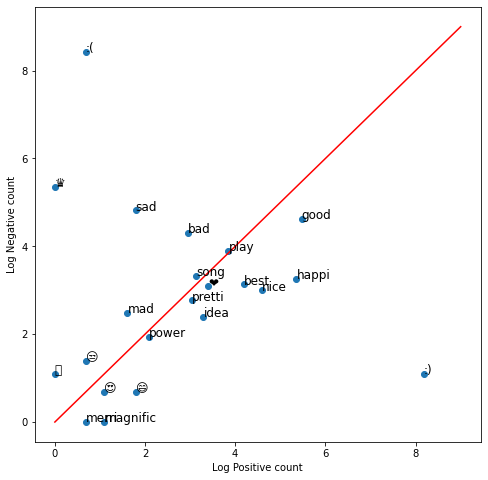

In [12]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])  

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()